# Normalisation of Signal

#### - Feature Scaling (max-min scaling)
#### - Mean Scaling
#### - Z-score Scaling 
#### - Maximum normalisation
#### - Vector normalisation

## Feature Scaling

### $x_{n} = \frac{x - x_{min}}{x_{max} - x_{min}}$

This scales data into a range, particularly [0,1].

To scale to the range [a, b]:

### $x_{n} = a + (b - a)\frac{x - x_{min}}{x_{max} - x_{min}}$

#### Issue: Does not preserve zero values

In [91]:
def feature_scaling(array, limits):
    minimum = np.min(array)
    maximum = np.max(array)
    a = limits[0]
    b = limits[1]
    arr_norm = a + (b - a)*(array - minimum)/(maximum - minimum)
    
    # This will define what the new x = 0 axis is.
    new_zero_axis = a + (b - a)*(0 - minimum)/(maximum - minimum)
    
    return arr_norm, new_zero_axis

<IPython.core.display.Javascript object>


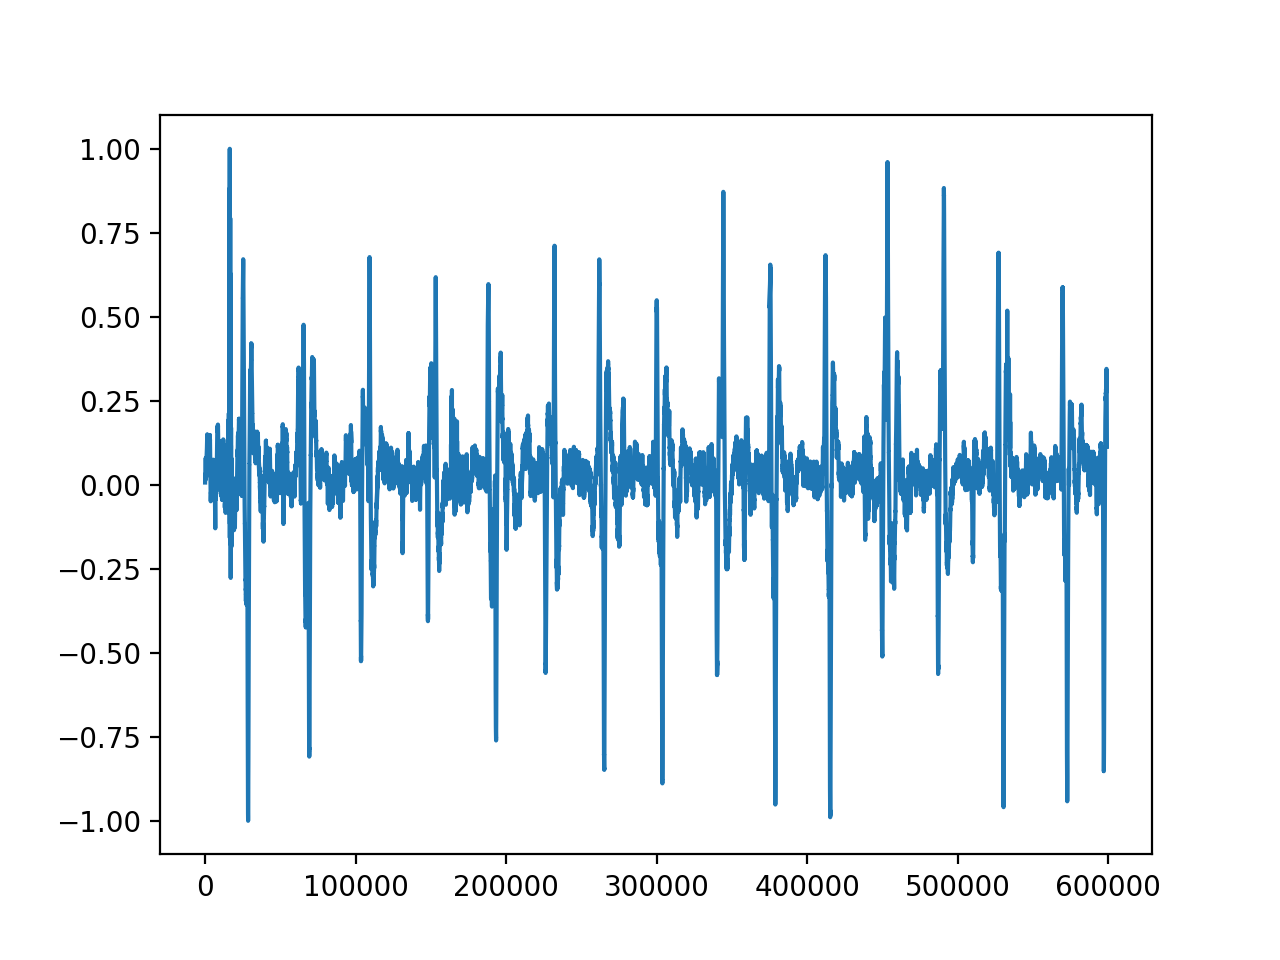

0.031661330487370964


In [92]:
[arr_norm, new_zero] = feature_scaling(wav_array, [-1, 1])

%matplotlib notebook

plt.plot(arr_norm)
print(new_zero)

## Mean Normalisation

### $x_n = \frac{x - x_{mean}}{x_{max} - x_{min}}$

In [93]:
def mean_normalisation(array):
    minimum = np.min(array)
    maximum = np.max(array)
    mean = np.mean(array)

    arr_norm = (array - mean)/(maximum - minimum)
    
    return arr_norm

<IPython.core.display.Javascript object>


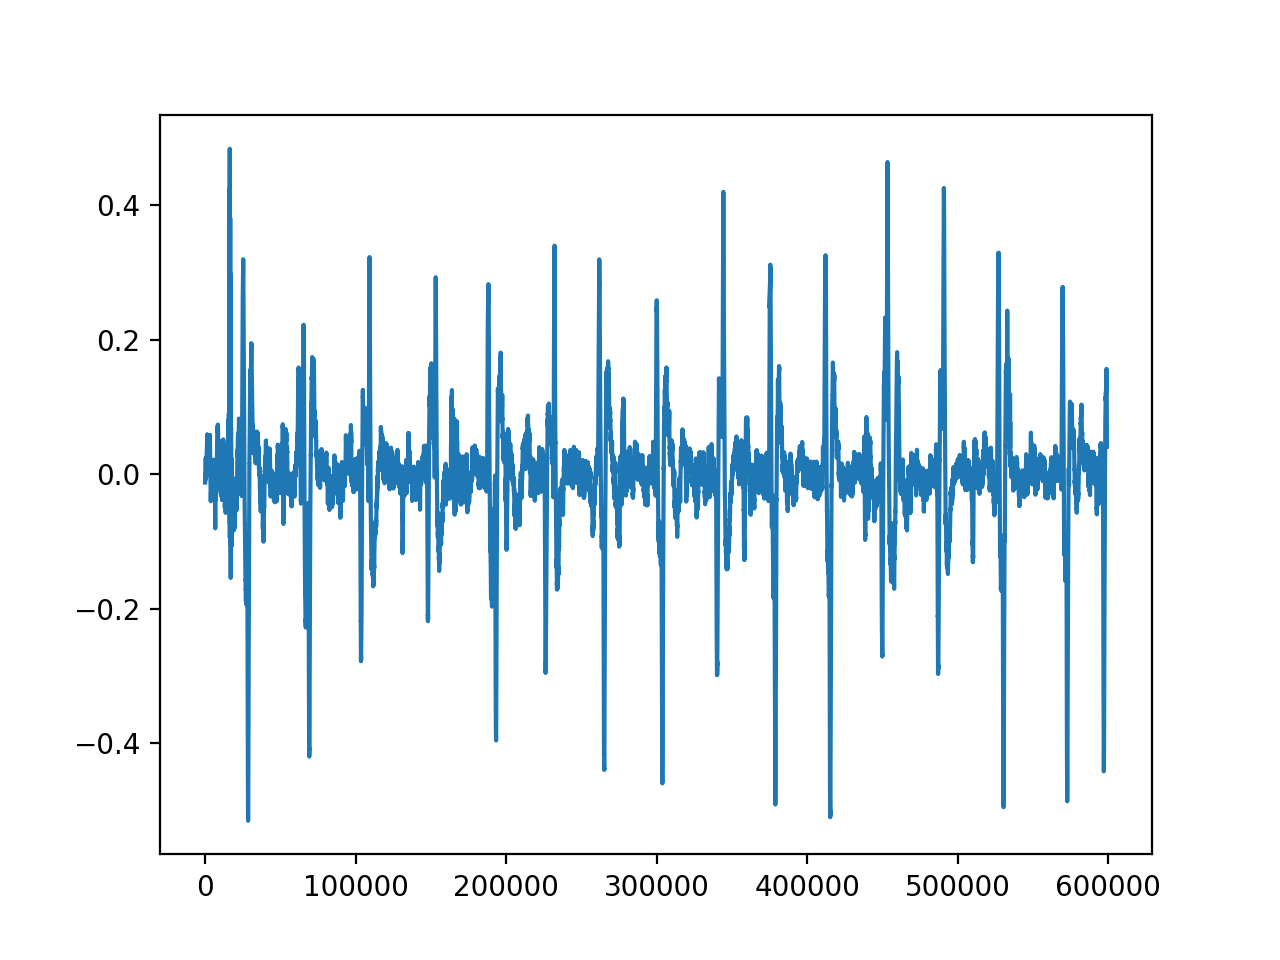

In [94]:
arr_norm = mean_normalisation(wav_array)

%matplotlib notebook

plt.plot(arr_norm)
# print(new_zero)

## Z-Score Scaling

### $x_n = \frac{x - x_{mean}}{\sigma}$

Result tells us how many standard deviations away from the mean something is.

In [2]:
def zscore_scaling(x):
    mean = np.mean(x) # This is heavily influenced by the otliers, so to make this more robust we need to only look at noise 
    sigma = np.std(x)
    print(sigma)
    print(mean)
    x_norm = (x - mean)/sigma
    return x_norm, mean, sigma

def zscore_scaling_noise(x):
    mean = np.mean(x[75000:100000]) 
    sigma = np.std(x[75000:100000])
    print(sigma)
    print(mean)
    x_norm = (x - mean)/sigma
    return x_norm

# This uses the mean and sigma value of a different data set and valuculates zscore using the new data values
def zscore_different_data(x, mean, sigma):
    x_norm = (x - mean)/sigma
    return x_norm


589.5594966988018
-0.4645918530700159


<IPython.core.display.Javascript object>


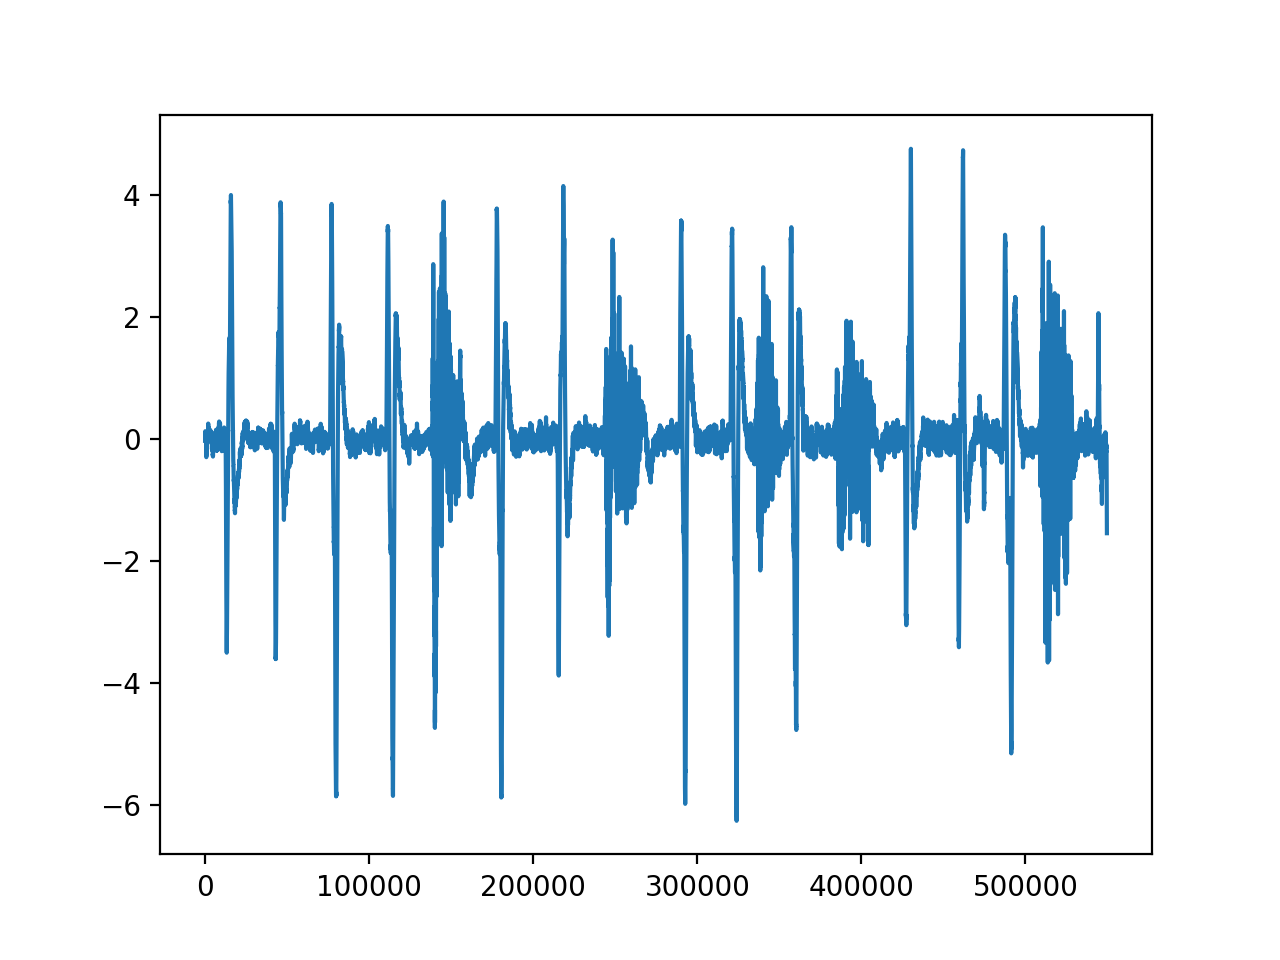

<IPython.core.display.Javascript object>


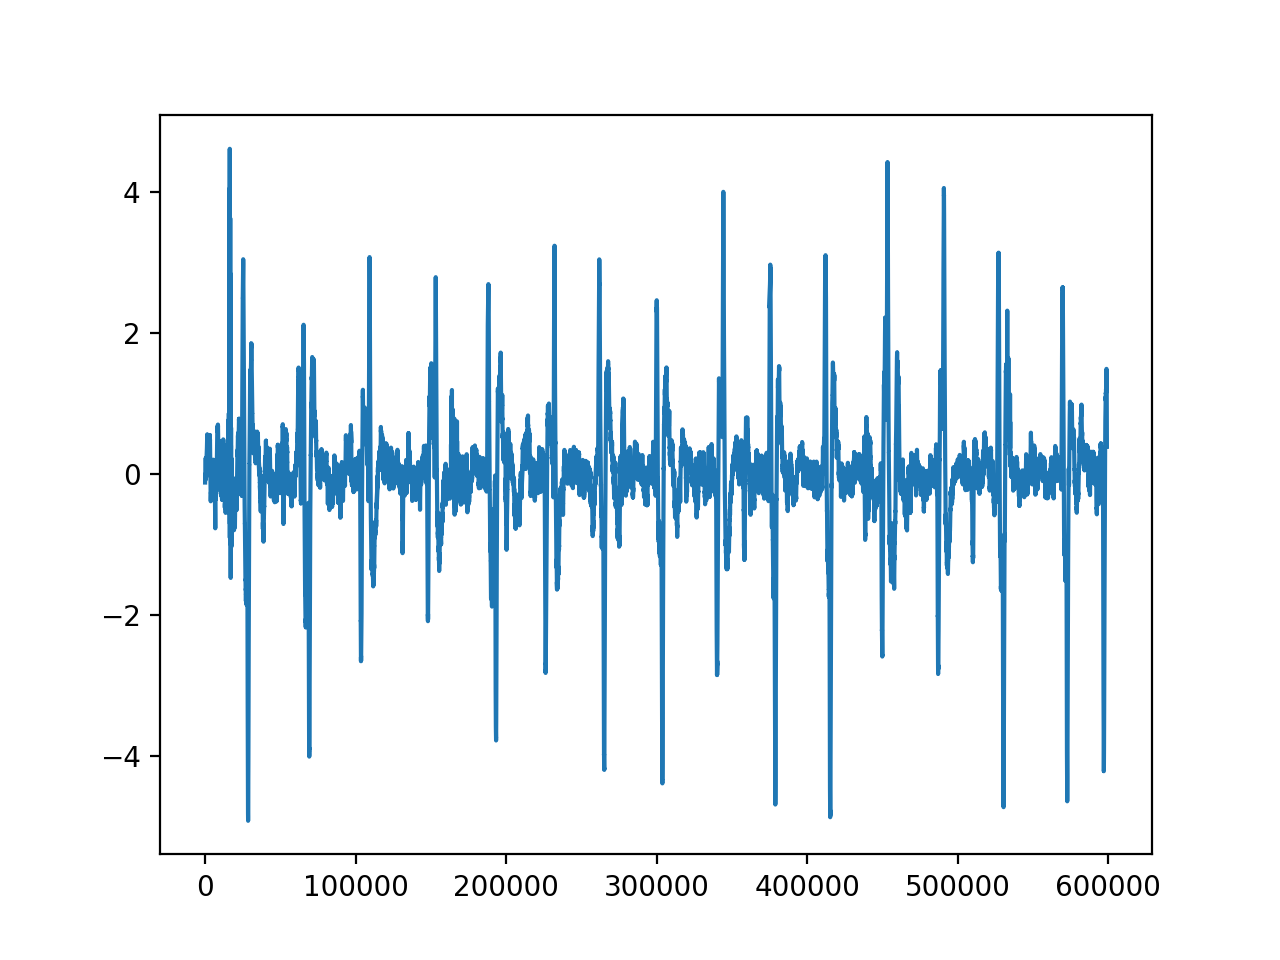

In [4]:
[arr_norm, mean, sigma] = zscore_scaling(wav_array2)
# arr_norm_noise = zscore_scaling_noise(wav_array)
arr_norm_diff_data = zscore_different_data(wav_array, mean, sigma) 

# must test if mean and sigma change A LOT (especially with blinks)


%matplotlib notebook
plt.figure(1)
plt.plot(arr_norm)

# plt.figure(2)
# plt.plot(arr_norm_noise)

plt.figure(2)
plt.plot(arr_norm_diff_data)

## Diviidng by max
### $ x_n = \frac{x}{x_{abs max}}$

In [123]:
def max_normalisation(x):
    abs_max = np.max(np.abs(x))
    x_norm = x/abs_max
    return x_norm

<IPython.core.display.Javascript object>


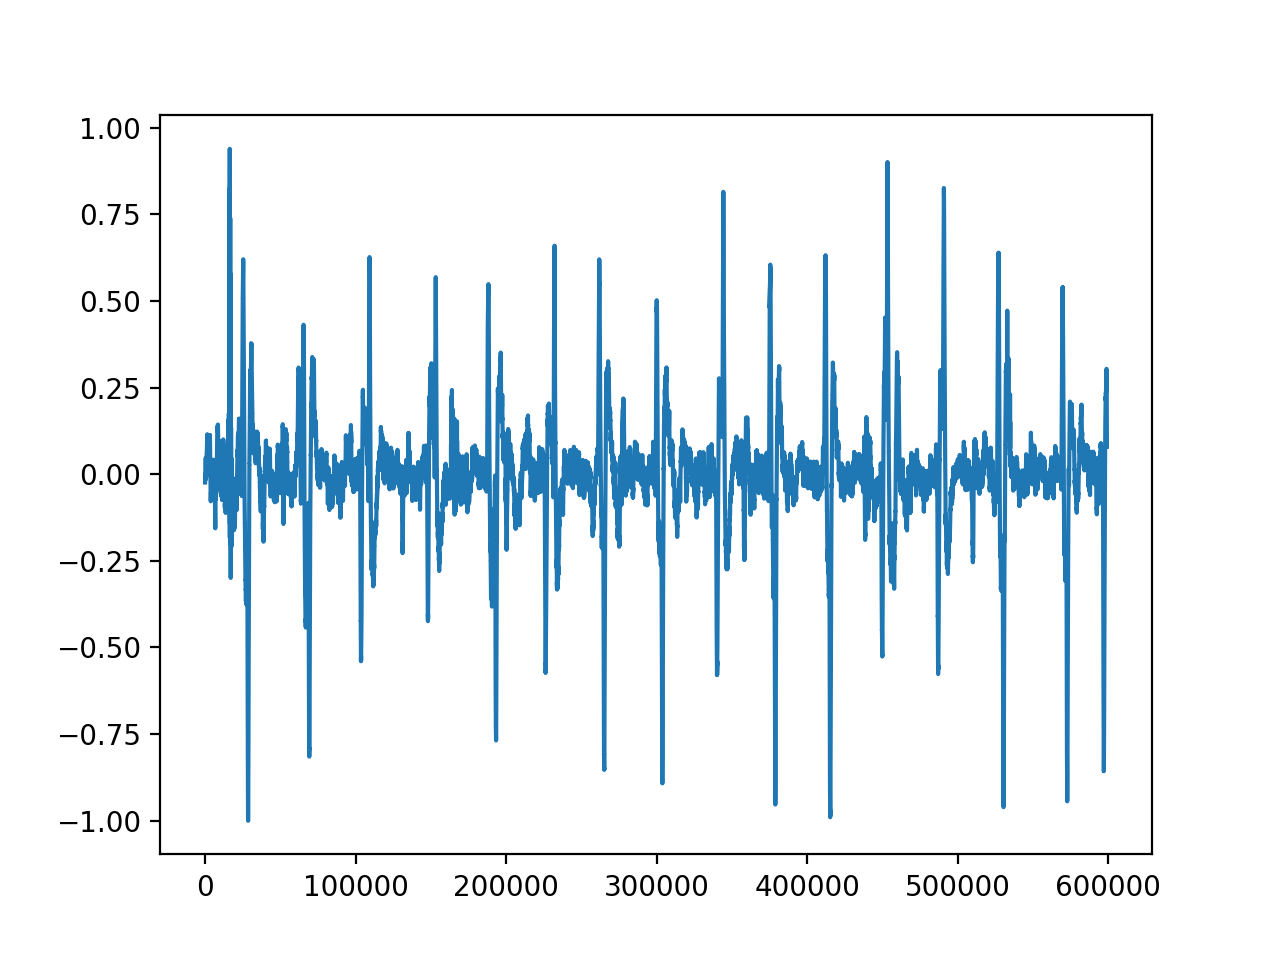

In [124]:
arr_norm = max_normalisation(wav_array)

%matplotlib notebook
plt.plot(arr_norm)


## Vector Normalisation

### $x_n = \frac{x}{x_{norm}}$

Issue: x_norm will be very large because of the large peaks, thus x_n will be very small

In [125]:
def vector_normalsation(x):
    x_norm = np.linalg.norm(x)
    x_n = x/x_norm
    return x_n

<IPython.core.display.Javascript object>


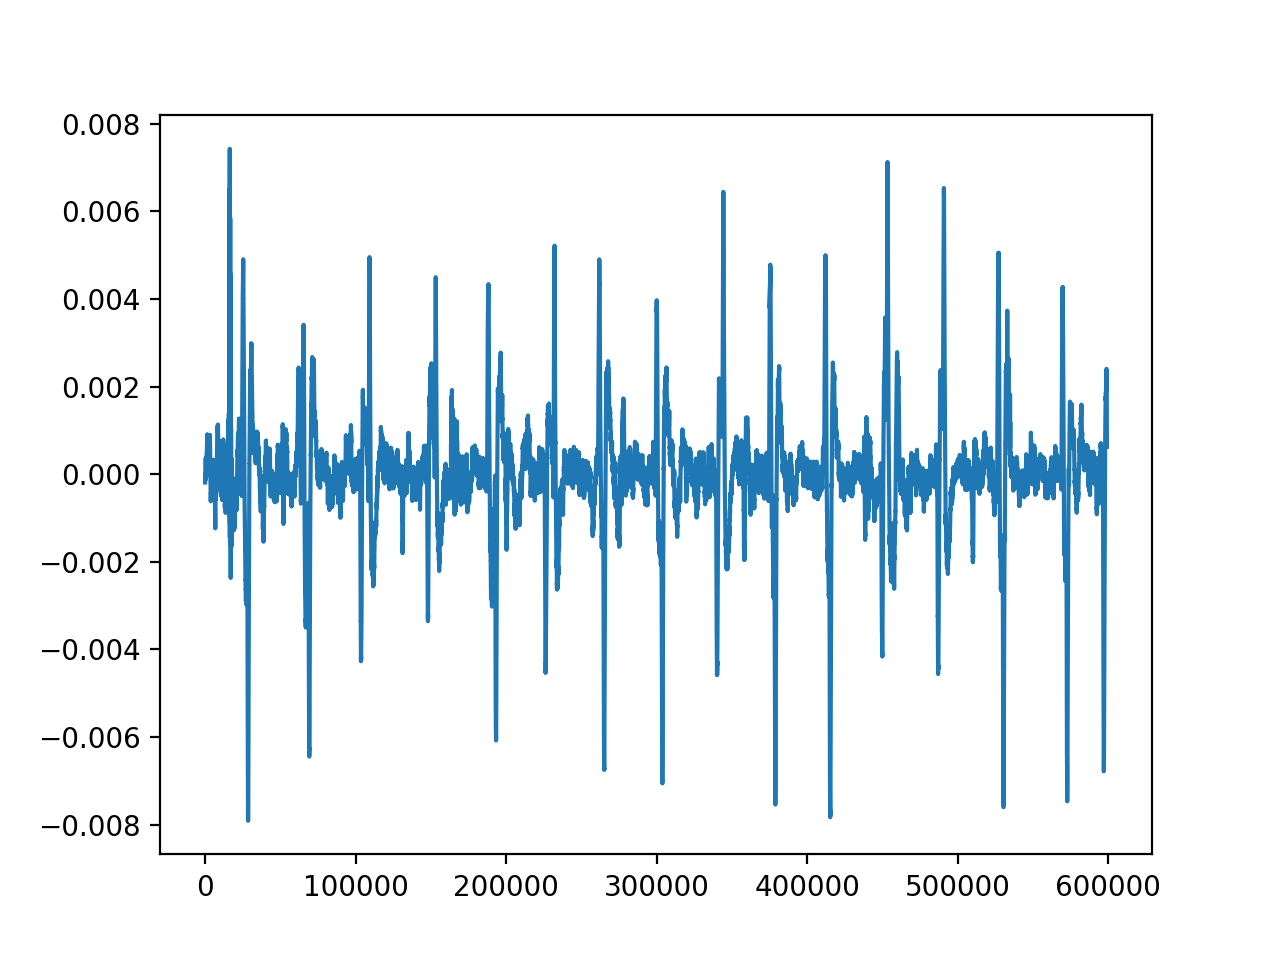

In [128]:
arr_norm = vector_normalsation(wav_array)

%matplotlib notebook
plt.plot(arr_norm)


Number of channels 1
Sample width 2
Frame rate. 10000
Number of frames 599280
parameters: _wave_params(nchannels=1, sampwidth=2, framerate=10000, nframes=599280, comptype='NONE', compname='not compressed')
Number of channels 1
Sample width 2
Frame rate. 10000
Number of frames 549704
parameters: _wave_params(nchannels=1, sampwidth=2, framerate=10000, nframes=549704, comptype='NONE', compname='not compressed')


<IPython.core.display.Javascript object>


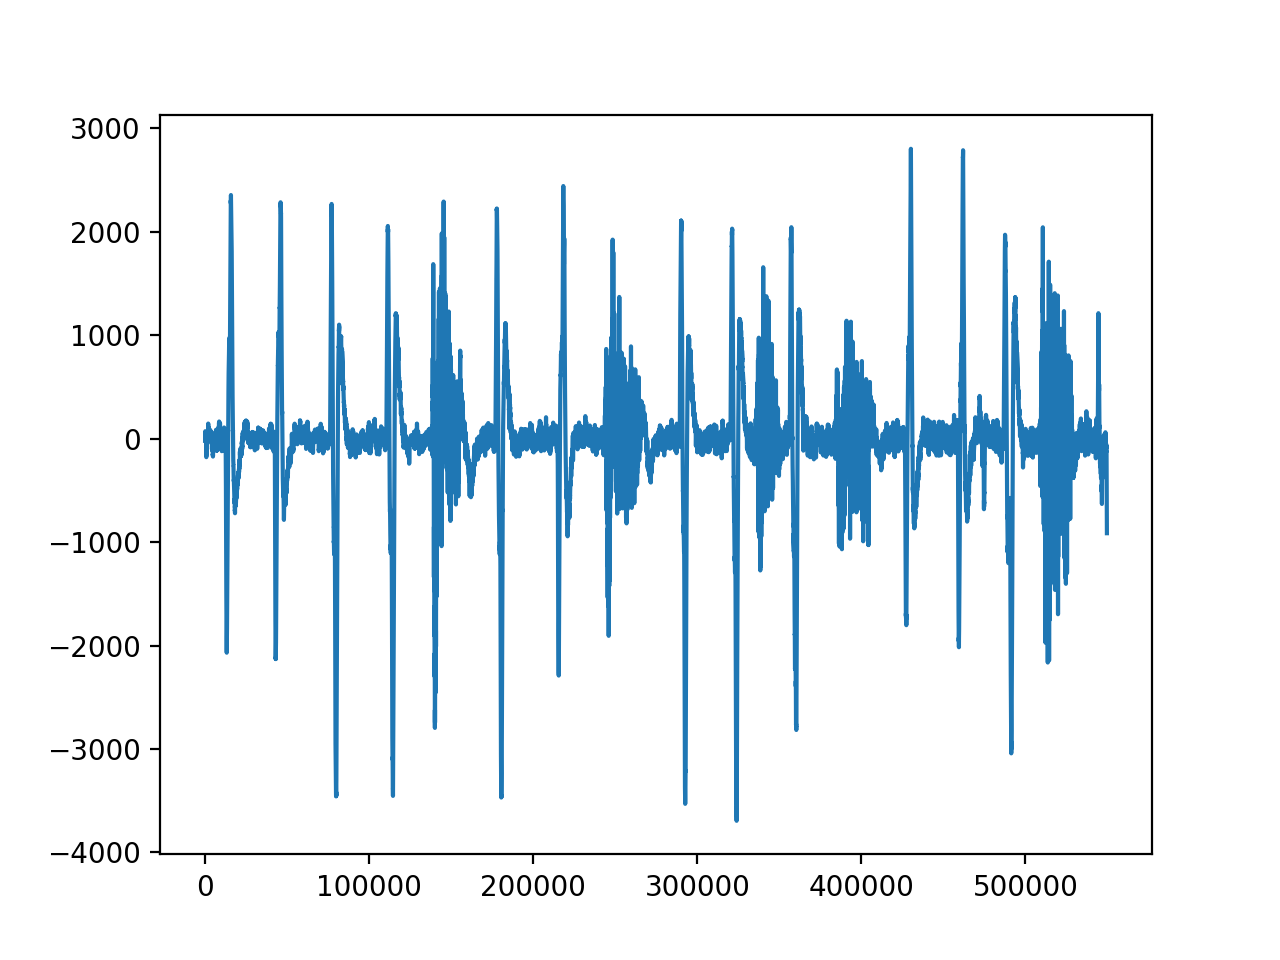

In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import time
import wave, struct
import os

path = "/Users/stephanie/Documents/2021 Sem 1/PHYS3888/Interdisciplinary Lab/github/Good Data - Sandeep no errors/"
files = os.listdir(path)
os.chdir(path)

filename = 'left-middle-right-steph.wav'

idx = files.index(filename)
file = files[idx]

wav = wave.open(file,'r')
print( "Number of channels",wav.getnchannels())
print ( "Sample width",wav.getsampwidth())
print ( "Frame rate.",wav.getframerate())
print ("Number of frames",wav.getnframes())
print ( "parameters:",wav.getparams())

framerate = wav.getframerate()
nframes = wav.getnframes()   
wav_array = np.array(struct.unpack("<" + "h"*nframes, wav.readframes(nframes)))


filename = 'left-middle-right-middle-eyebrow-marina.wav'
idx = files.index(filename)
file = files[idx]

wav = wave.open(file,'r')
print( "Number of channels",wav.getnchannels())
print ( "Sample width",wav.getsampwidth())
print ( "Frame rate.",wav.getframerate())
print ("Number of frames",wav.getnframes())
print ( "parameters:",wav.getparams())

framerate = wav.getframerate()
nframes = wav.getnframes()   
wav_array2 = np.array(struct.unpack("<" + "h"*nframes, wav.readframes(nframes)))

%matplotlib notebook
plt.plot(wav_array2)

References:
https://business.blogthinkbig.com/warning-about-normalizing-data/
https://en.wikipedia.org/wiki/Feature_scaling#:~:text=Feature%20scaling%20is%20a%20method,during%20the%20data%20preprocessing%20step.
https://en.wikipedia.org/wiki/Feature_scaling